# Use this to generate FFT for displacement data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
import os

In [101]:
# Load the data

data_lose = pd.read_csv('data/cooler/cool.txt')
data_lose.columns = data_lose.columns.str.strip()

data_lose['seconds']= data_lose['seconds'].round().astype('Int64')
data_lose.head()

,seconds,accX,accY,accZ,temp
0,1,0.07,1.29,0.30,39.99
1,1,0.09,2.05,0.54,38.15
2,1,0.09,2.05,0.01,38.69
3,1,-0.05,1.00,0.01,38.69
4,1,-0.19,-0.02,-0.43,41.08


In [78]:

def make_fft_plot(displacement, RPS, name):

    N = len(displacement.values)
    fft_data = fft(displacement.values)
    frequencies = fftfreq(N, 1/RPS)

    positive_frequencies = frequencies[1:N // 2]
    positive_fft = np.abs(fft_data[1:N // 2])

    # Find the peak frequency
    peak_index = np.argmax(positive_fft)
    natural_frequency = positive_frequencies[peak_index]

    print(f"The natural frequency of the object is: {natural_frequency} Hz")

    # Plot the FFT results
    plt.plot(positive_frequencies, positive_fft)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.title(f'FFT of {name} Data')
    plt.show()


222.86666666666667
The natural frequency of the object is: 29.681423870774747 Hz


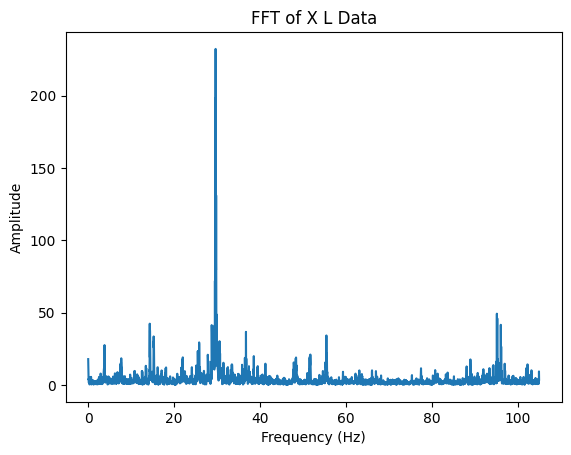

The natural frequency of the object is: 29.681423870774747 Hz


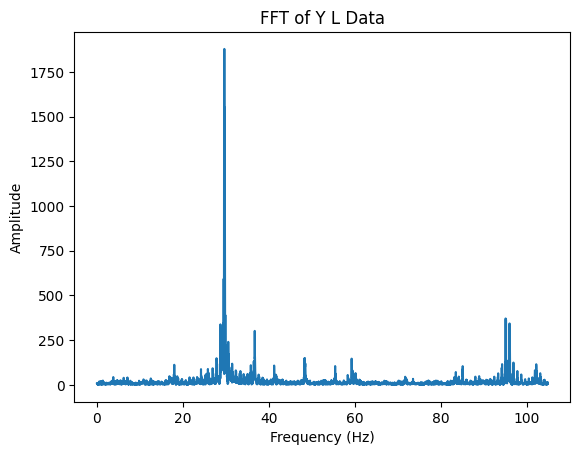

The natural frequency of the object is: 29.681423870774747 Hz


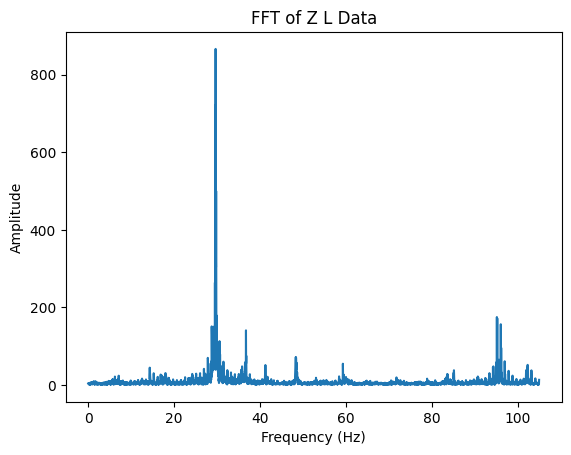

In [105]:

RPS = data_lose['seconds'].value_counts().mean()
# RPS = 42 # Manual overide

# make_fft_plot(data_lose['accel_x'], RPS, 'X')
# make_fft_plot(data_lose['accel_y'], RPS, 'Y')
# make_fft_plot(data_lose['accel_z'], RPS, 'Z')

make_fft_plot(data_lose['accX'], RPS, 'X L')
make_fft_plot(data_lose['accY'], RPS, 'Y L')
make_fft_plot(data_lose['accZ'], RPS, 'Z L')

# make_fft_plot(data_onboard['accX'], RPS, 'X O')
# make_fft_plot(data_onboard['accY'], RPS, 'Y O')
# make_fft_plot(data_onboard['accZ'], RPS, 'Z O')
